# 1. Temporal Patterns

We look only at the focus-crimes in the exercise below

In [2]:
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'}

We have been asked to cover the following four areas:
* *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2020/master/files/weekdays.png). Hint for comment: Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
* *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
* *The 23 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
* *Hours of the week*. But by looking at just 23 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

## 1.1 Weekly patterns

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import folium

In order to calculate the weekly patterns, we create a subgraph for each crime and group it by day of the week.

<Figure size 432x288 with 0 Axes>

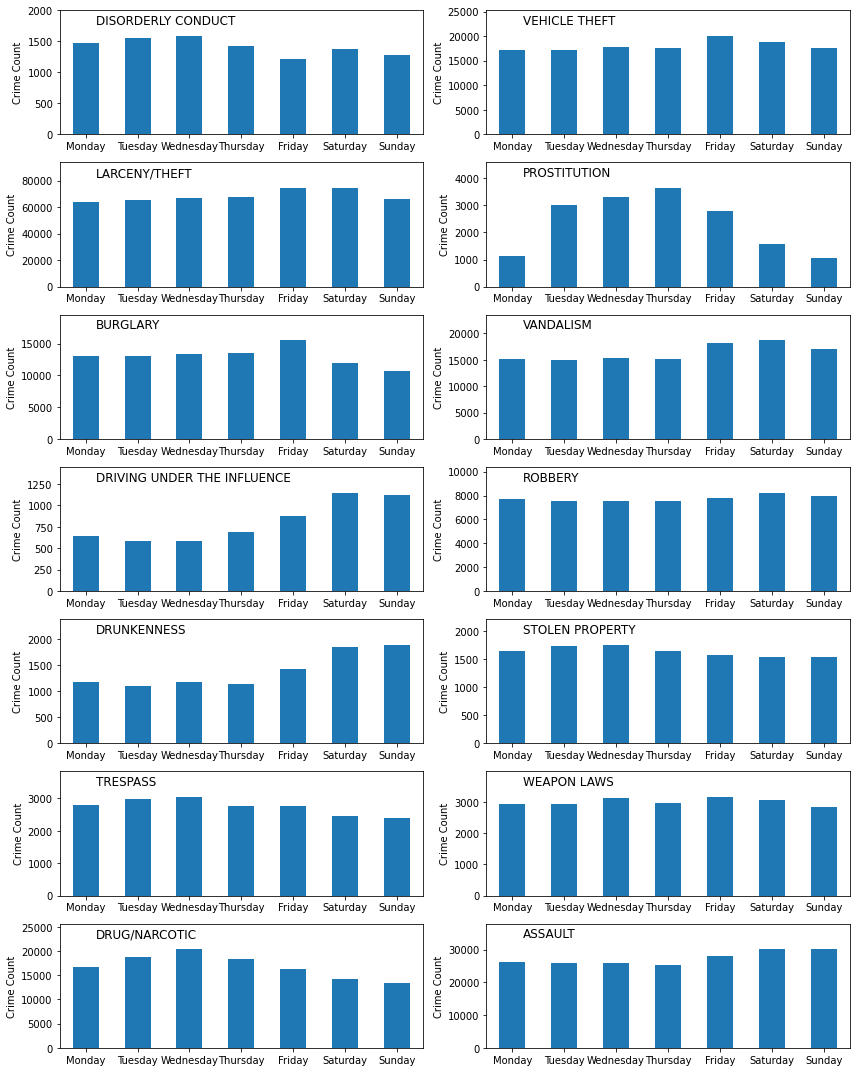

In [4]:
df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.subplots_adjust(wspace=2, hspace=10)
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(12,15))
# Converts df['Date'] to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

#Construct plot based on Category and DayOfWeek
for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(df.DayOfWeek).agg('count').reindex(cats).plot(kind='bar', xlabel="",ylabel="Crime Count", ax=ax)
    ax.set_title(crime, loc='left', x=0.1, y=1.0, pad=-14)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)

fig.tight_layout()
_ = plt.show()

In general, most of the crimes involving alcohol and partying seem to be centered around the weekend, like drunkenness, vandalism and driving under influence. Surprisingly enough drug and narcotic cases seems to decrease when approaching the end of the week, where as one would belive it goes hand in hand with the theme of alcohol and partying. 

Furthermore, it seems like most burglaries happens generally on weekdays and especially on Friday, but less on Saturday and Sunday. This is probably related to when inhabitants are at home or not. As the presence of inhabitants can be quite inconvenient to the work of burglars. 

## 1.2 The Months

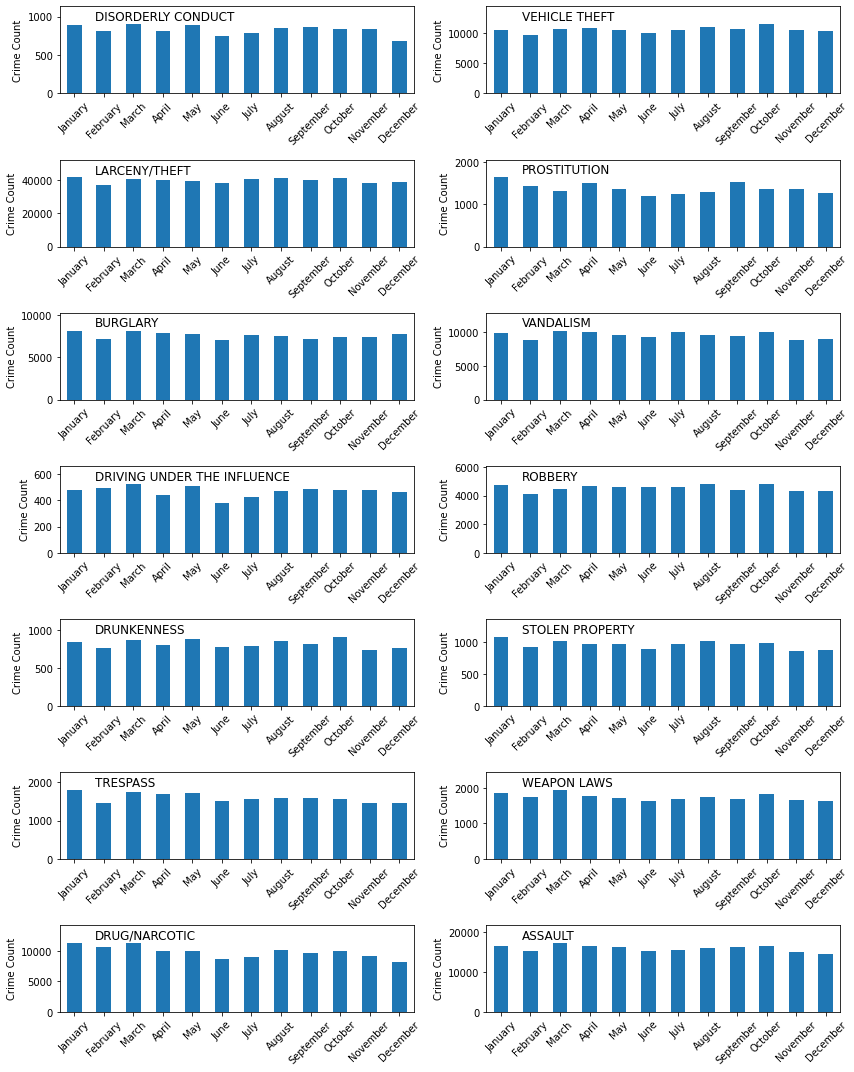

In [5]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(12,15))
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', "August", "September", "October", "November", "December"]
months = df.Date.dt.strftime('%B')

#Construct plot based on Category and month_names
for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(months).agg('count').reindex(month_names).plot(kind='bar', xlabel="", ylabel="Crime Count", ax=ax)
    ax.set_title(crime, loc='left', x=0.1, y=1.0, pad=-14)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

fig.tight_layout()
plt.show()

No intriguing patterns are particularly visualized by counting the number of crimes through the months. The majority of crimes remain pretty constant throughout the course of a year. However, a slight decrease in crimes can be observed in the summer months of June and July and the winter month, February. Maybe because people travel in June and July? Because the sun is less cloudy and more people are energized?

A surprise might be prostitution that peaks in January. This could be because of loneliness after the holidays and winter depression, leading people to seek out prostitutes. 

## 1.3 The 24 hour cycle

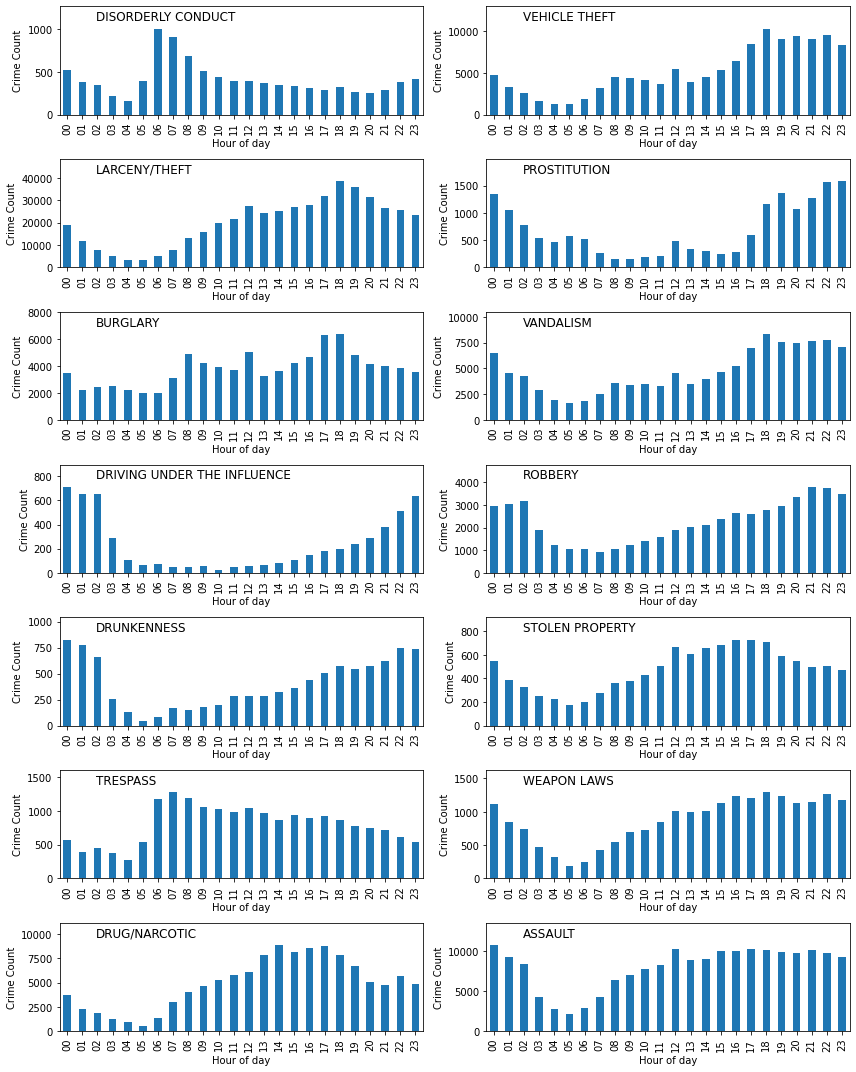

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(12,15))
# Converts df['Time'] to datetime objects
df['Time'] = pd.to_datetime(df['Time'])
hours = df.Time.dt.strftime('%H')

#Construct plot based on Category and hours
for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(hours).agg('count').plot(kind='bar', xlabel="Hour of day",ylabel="Crime Count", ax=ax)
    ax.set_title(crime, loc='left', x=0.1, y=1.0, pad=-14)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)

fig.tight_layout()
plt.show()

As could be expected, most crimes are not committed during the hours 02-07. An interesting outlier is driving under the influence, where the vast majority of crimes are committed from 23 to 03, and disorderly conduct, where the vast majority of crimes are committed from 06 to 09, presumably when people are on their way home from a party.

## 1.4 Hours of the week

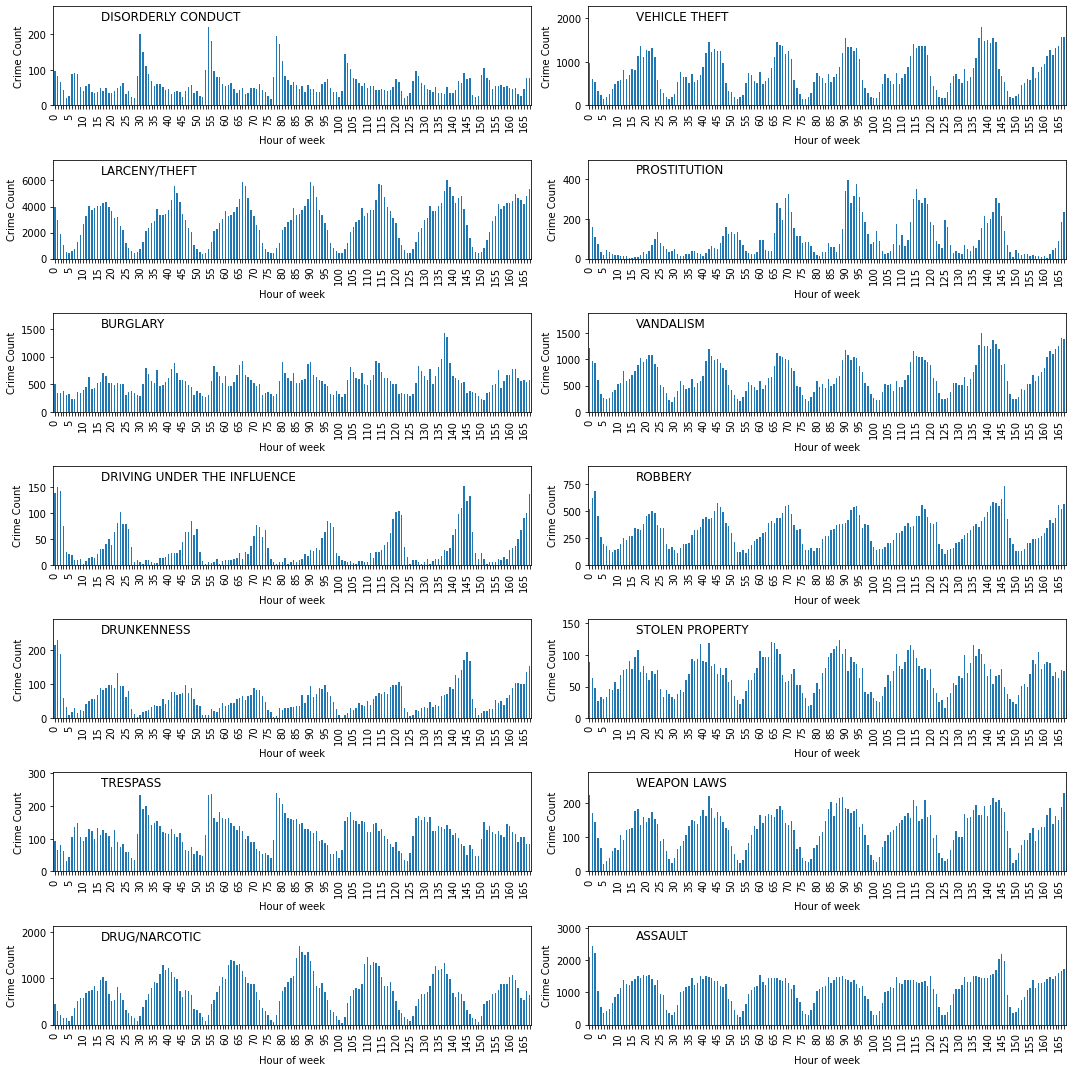

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(15,15))
weekday_as_number = df.Date.dt.strftime('%w').astype(int)
hours_of_week = weekday_as_number*24+hours.astype(int)

#Construct plot based on Category and hours_of_week
for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(hours_of_week).agg('count').plot(kind='bar', xlabel="Hour of week",ylabel="Crime Count", ax=ax)
    ax.set_title(crime, loc='left', x=0.1, y=1.0, pad=-14)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
    
    #Hide half of the ticks for visibility
    for index, tick in enumerate(ax.xaxis.get_ticklabels()):
        if index%5 == 0:
            continue
        
        tick.set_visible(False)
    
fig.tight_layout()
plt.show()

It seems like a lot of crimes are taking place on Friday night, around the 135 hour mark. Furthermore, it seems like drunkenness is mostly a problem on Friday night, around the 145 hour mark.

We can see nothing particarly new when visualizing the count of crimes over the hours of the week, which is not also a pattern visible when viewing the crimes on a weekly basis and a hourly basis, as we did in task 1.1 and 1.3. 

Nevertheless, this "Hour of week" pattern depicts the activities happening better than the two other patterns, weekly and hourly. As it illustrates the differences of each weekday more correctly. From these exercises, we can see how the weekend is often different than the weekdays. And because this "Hour of week" pattern does not average all days together, a more correct visualization is created.

# 2 Thinking about data and visualization

*Exercise:* Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).
* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
* What is the difference between a bar-chart and a histogram?
* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

## 2.1 Pearson Correlation

The pearson correlation presents a way of summarizing a scatter plot into a value between -1 and 1, denoting the correlation between two variables. The Pearson Correlation is calculated using the following formula:

$\rho_{xy} = \frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}$ which can be simplified as 
$\rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}$ where $\bar {y}$ is the mean of y

### How it works
The Pearson Correlation can be explained as the normalized meassure of the covariance. The value of the correlation, between -1 and 1, shows which correlation there is between the two variables. If the value is 1, the values lie on a straight line. An increase in the value on the x-axis will lead to an increase on the y-axis. Similarly with -1, an increase on the x-axis will lead to a decrease on the y-axis. With values close to 0, no change will be made when the x-axis is increased.

### Where it does not work
The Pearson Correlation does not work optimally if there is a lot of noise, as it does not remove outliers. An example where visualization works, but the Pearson Correlation doesn't is Anscombe's Quartet. Here, 4 different data sets have nearly identical values for many different properties, while their actual distributions are vastly different.

## 2.2 Bar chart vs histogram?

While a bar chart represents categorical data, a histogram represents continous, quantitative data. In other words, a bar chart is made to compare different variables, while a histogram shows the distribution of variables.

Meaning, a bar chart can be used to show the number of different types of cars ("Red cars", "Blue cars" and "Green Cars"). A histogram is often used on a range to show the number of observations.

## 2.3 Bin-size

There are many ways to choose bin-size. A frequently used method is Sturge's rule. Sturge's rule is built around the following formula: 

$K = 1 + 3.322 \log N$

Where K is the number of bins and N is the number of observations in a set. This means that based on the number of observations, the number of bins can be calculated.

It is important to note that Sturge's rule works better when data is not heavily skewed. Furthermore, it does not perform optimally when given a data set with more than 200 data points, as it leads to over-smoothing.

## 3 Generating important plot types

*Excercise*: Let us recreate some plots from DAOST but using our own favorite dataset.

## 3.1 Jitter plot
* First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data.

In [8]:
df.Time = df.Time.apply(lambda x: x.time())

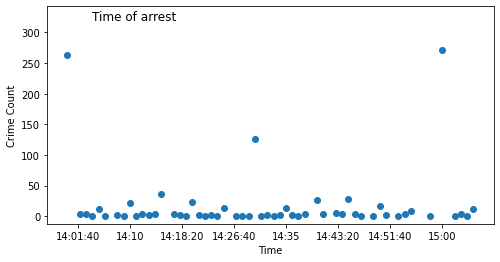

In [9]:
start_month = df.Date > datetime.datetime(year=2009, month=1, day=1)
end_month = df.Date < datetime.datetime(year=2009, month=7, day=1)
values = df.Time.loc[(df.Category == 'LARCENY/THEFT') & (start_month) & (end_month) & 
                     (df.Time > datetime.time(13,59)) & 
                     (df.Time <= datetime.time(15,5))].groupby(df.Time).agg("count")

df2 = values.to_frame()
df2.columns = ["Num"]
df2.reset_index(inplace=True)
_ = df2.plot(x='Time', y='Num', lw=0, marker='o', figsize=(8,4), legend=False, ylabel = "Crime Count")
ax = plt.gca()
ax.set_title("Time of arrest", loc='left', x=0.1, y=1.0, pad=-14)
_ = ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)

As can be seen above, police officers have a tendency to note down the time of an arrest at a different time than it actually occurs. For instance, there is a large spike in arrests at 14:00 and 15:00 with a minor spike at 14:30 as well. Even in the minutes in between these points, it seems like the officers round to the nearest 5 minute interval.

## 3.2 Histograms
* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

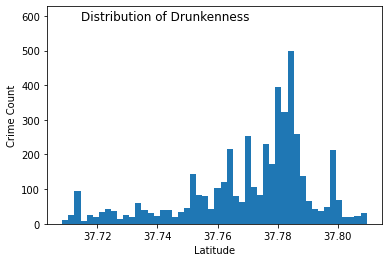

In [10]:
df['Latitude'] = df.location.apply(lambda x: float(x.replace("POINT (", "").replace(")", "").split()[1]))
df['Longitude'] = df.location.apply(lambda x: float(x.replace("POINT (", "").replace(")", "").split()[0]))
drunk = df.loc[((df.Category == "DRUNKENNESS")) & (start_month) & (df.Date < datetime.datetime(year=2015, month=7, day=1))]
vandal = df.loc[((df.Category == "VANDALISM")) & (start_month) & (df.Date < datetime.datetime(year=2015, month=7, day=1))]
plt.hist(drunk.Latitude, 50)
ax = plt.gca()
ax.set_title("Distribution of Drunkenness", loc='left', x=0.1, y=1.0, pad=-14)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
ax.set_xlabel("Latitude")
_ = ax.set_ylabel("Crime Count")

It would seem that drunkenness is centered around a few geographical areas. This intuitively make sense, as there are usually areas with many bars and separate residential areas. Therefore, we would expect people to be caught being drunk in specific areas.

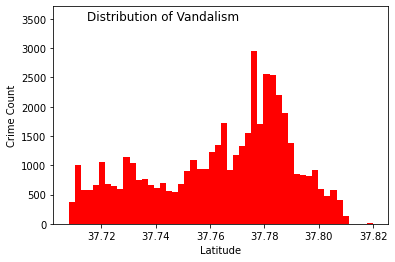

In [11]:
plt.hist(vandal.Latitude, 50, color="r")
ax = plt.gca()
ax.set_title("Distribution of Vandalism", loc='left', x=0.1, y=1.0, pad=-14)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.2)
ax.set_xlabel("Latitude")
_ = ax.set_ylabel("Crime Count")

It seems like vandalism follows an entirely different pattern. While there is an area that contains a large proportion of vandalism, it is more evenly spread out across the city.

# 4 A bit of geo-data

## 4.1 Plot SF
* First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command `folium.Map([lat, lon], zoom_start=13)`, where you'll have to look up San Francisco's longitude and latitude.

In [13]:
sf_map = folium.Map([37.77919, -122.41914], zoom_start=13, tiles="Stamen Toner")
sf_map

## 4.2 Plot the SF City Hall
* Next, use the the coordinates for SF City Hall `37.77919, -122.41914` to indicate its location on the map with a nice, pop-up enabled maker

In [14]:
folium.Marker([37.77919, -122.41914], popup='City Hall').add_to(sf_map)
sf_map

## 4.3 Plot Drug/Narcotics
* Now, let's plot some more data (no need for popups this time). Select a couple of months of data for `'DRUG/NARCOTIC'` and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. 

In [15]:
df["Year"] = df.Date.apply(lambda x: x.year)
drugs = df.loc[(df.Category == 'DRUG/NARCOTIC') & (df.Date > datetime.datetime(year=2009, month=1, day=1)) & (df.Date < datetime.datetime(year=2009, month=2, day=1))]

for _, row in drugs.iterrows():
    folium.CircleMarker([row["Latitude"], row["Longitude"]], radius=2, color='red').add_to(sf_map)
    
sf_map

As seen on the map, the largest concentration of the drug related crimes can be found in the "Tenderloin" area. And a quick search also reveals it as a high-crime neighborhood in San Fransisco.
https://en.wikipedia.org/wiki/Tenderloin%2C_San_Francisco#Crime

# 5 Errors in the data

In the exercises, 3 different data errors were found:
1. In the hourly activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.
2. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.
3. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/crime_hot_spot.png).

For each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

## 5.1 Prostitution data

By looking at the raw data, we see a significant increase of prostitution cases reported on Thursdays at 12:00 PM. Had we not noticed this and simply acknowledged it as the sloppy reporting of police officers, we would be led to believe that the majority of prostitiution takes place on Thursdays around noon.  

The spike in prostitution cases could simply indicate that the incidents found place near 12:00 PM on Thursdays, or if the reporting found place weeks later, then the spike could just be the result of police officers picking the very middle of the week out of convienince. Either way this would be a misrepresentation of the facts.

This kind of data-error creates a bias towards Thursday at 12:00 PM, and the majority of those cases should probably have been distributed more evenly across the week. This misconception could result in an overallocation of police ressources on Thursday around noon.

## 5.2 Recording of timestamps

Reporting the crimes in whole increments of 10 minutes reduces the accuracy of the timestamps, and therefore also the possiblity for drawing parallels between other events.

Believing un-critically in these timestamps creates misconceptions about how cases relate to other timely situations, for example whether or not an increase/decrease in a category of crime happens half an hour before or after eg. closing of bars, shutdown of public transportation or at the end of normal work hours.

Which brings us to the conclusion, that reporting in a more frequent interval could probably create stronger hypotheses.

## 5.3 Hall of Justice

Reporting crimes as located at the Hall of Justice might stem from using the Hall of Justice as a default place of location if no location is given. 

Believing in this bias leads to the misconception, that the Hall of Justice is a hotspot for sex offences, could make it a frequent area of stationing ekstra police force, which would lead to the misuse of police resources.